# Libraries

In [4]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

# Parameters

In [5]:
plt.rcParams["figure.figsize"] = (10,6)
warnings.filterwarnings('ignore')

# Ingest data


How to ingest data from different resources


https://sateesh110.medium.com/various-methods-to-ingest-data-into-google-colab-b5e51d591114


##### Google gdrive

In [6]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/')

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/ML-DS/Git-Repo/ML-devcode/Kaggle/Competitions/House Price Prediction/train.csv')

#### Excel

In [ ]:
#df = pd.read_excel('World military power.xlsx', header=1)  #for eliminating the first header
df = pd.read_excel("World military power.xlsx")

### External link

# EDA - Exploratory Data Analysis

## Format data

### Convert multi index columns to one level

In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

#another solution:
#df.columns = df.columns.get_level_values(0)

In [ ]:
# change the name of a column
df.rename(columns={'Military Strength': 'Country'}, inplace=True)

### Detect and drop duplicated columns

In [ ]:
# Add first column,
# Drop names of countries
# by selecting every second columns from first column onwards
df = pd.concat([df.iloc[:,0], df.iloc[:,range(1, 61, 2)]], axis=1)

### Check duplicated rows

In [ ]:
#check duplicated rows
df.duplicated().any()

### Check duplicated columns

In [ ]:
#check columns for duplicates
df.columns.duplicated().any()

#remove duplicated rows
#https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
#df = df.loc[:,~df.columns.duplicated()]

### Remove commas from numbers

In [ ]:
#remove commas from numbers
df.replace(',','', regex=True, inplace=True)

### Change dtype to number

In [ ]:
#change dtype to number
df_ = df.drop(["Country"], axis=1)
df_ = df_.astype(float)
df_.info()

then apply it to original dataset

In [ ]:
df = pd.concat([df['Country'], df_], axis=1)
df.info()

### Change index to a column

In [ ]:
#change index
df.set_index("Country")

## Correlation

In [9]:
#prints the most correlated numeric features with target column
# col_Target: label column's name
def print_corr_list(data, col_Target, precision=0.5):
    print(f'Corr between {col_Target} and :')
    for i in data.select_dtypes(['number']).drop(columns = col_Target) :
        c=data[col_Target].corr(data[i])
        if c > precision:
            print(f'{i:<12} : {c:.5}')

In [12]:
print_corr_list(df, 'SalePrice', 0.62)

Corr between SalePrice and :
OverallQual  : 0.79098
GrLivArea    : 0.70862
GarageCars   : 0.64041
GarageArea   : 0.62343


In [15]:
#gives the most correlated numeric features with target column
# col_Target: label column's name
def corr_columns(data, col_Target, precision=0.5):
   print(f'Correlated Columns with {col_Target}:')
   list = [col_Target]
   for i in data.select_dtypes(['number']).drop(columns = col_Target):
        c=data[col_Target].corr(data[i])
        if c > precision:
           list.append(i) 
   return list

In [16]:
list = corr_columns(df, 'SalePrice', 0.6)
list

Correlated Columns with SalePrice:


['SalePrice',
 'OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

## Heatmap

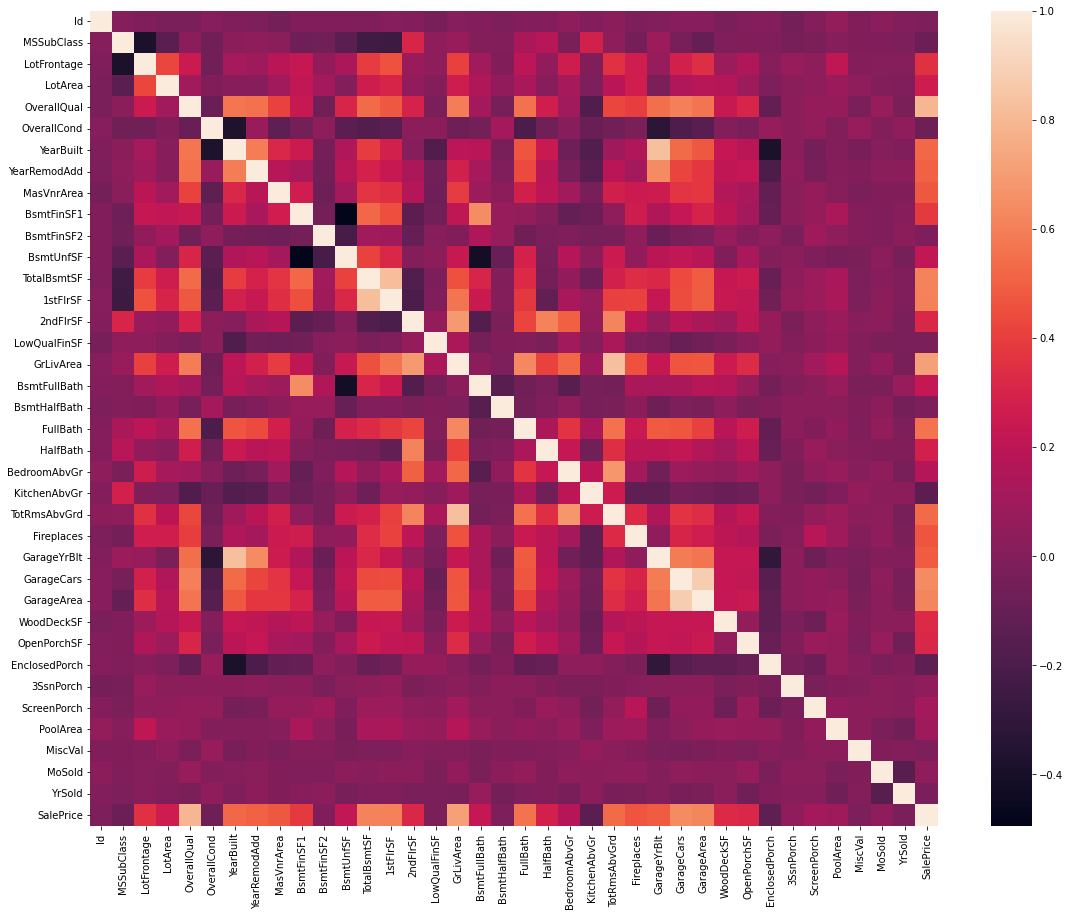

In [10]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr())

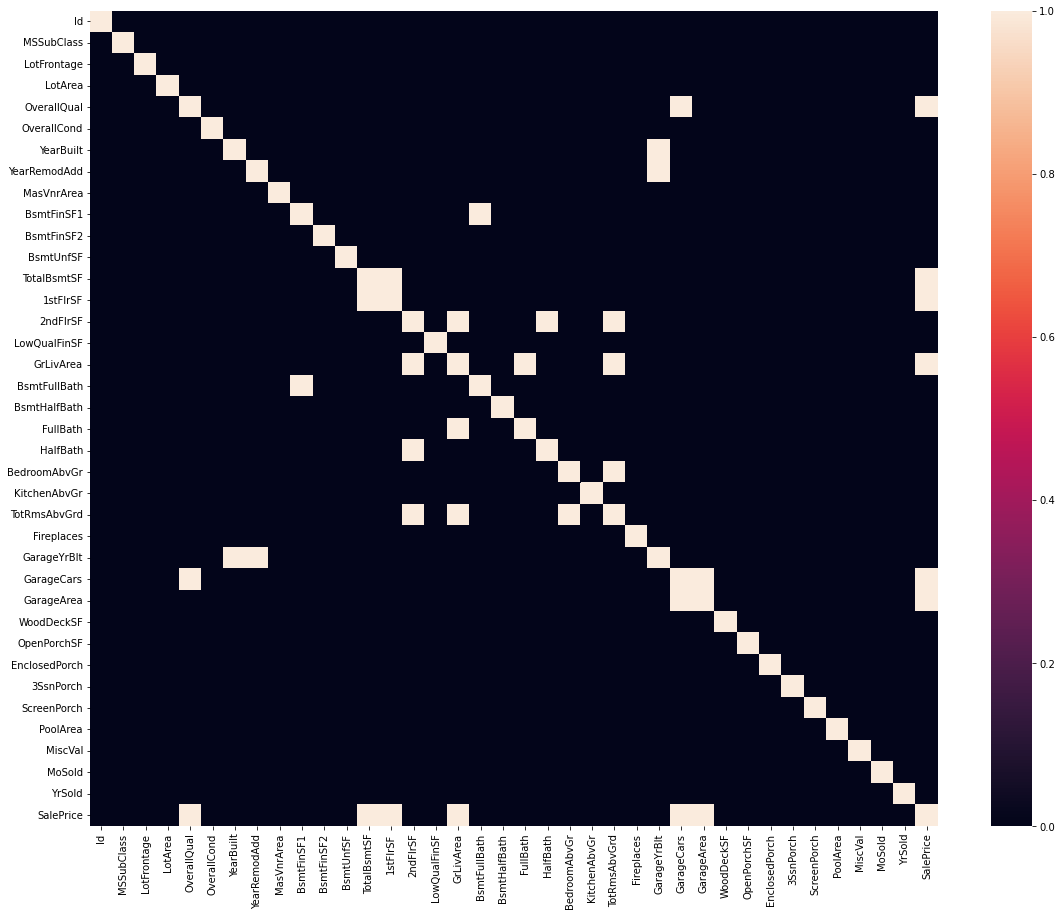

In [11]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr()>0.6) #>.7)

## Histogram

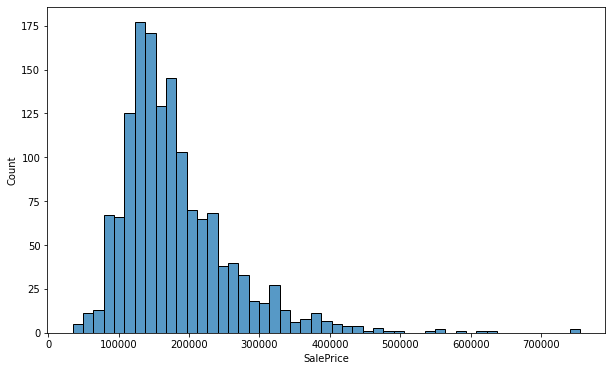

In [14]:
target_col = 'SalePrice'
plt.rcParams["figure.figsize"] = (10,6)
sns.histplot(data=df, x=target_col)

## Pairplot

In [ ]:
target_col = 'target'
sns.pairplot(df.select_dtypes(include='number'), hue = target_col)

### If the number of columns are huge

In [28]:
target = 'SalePrice'
list = corr_columns(df, target, 0.6)
list

Correlated Columns with SalePrice:


['SalePrice',
 'OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

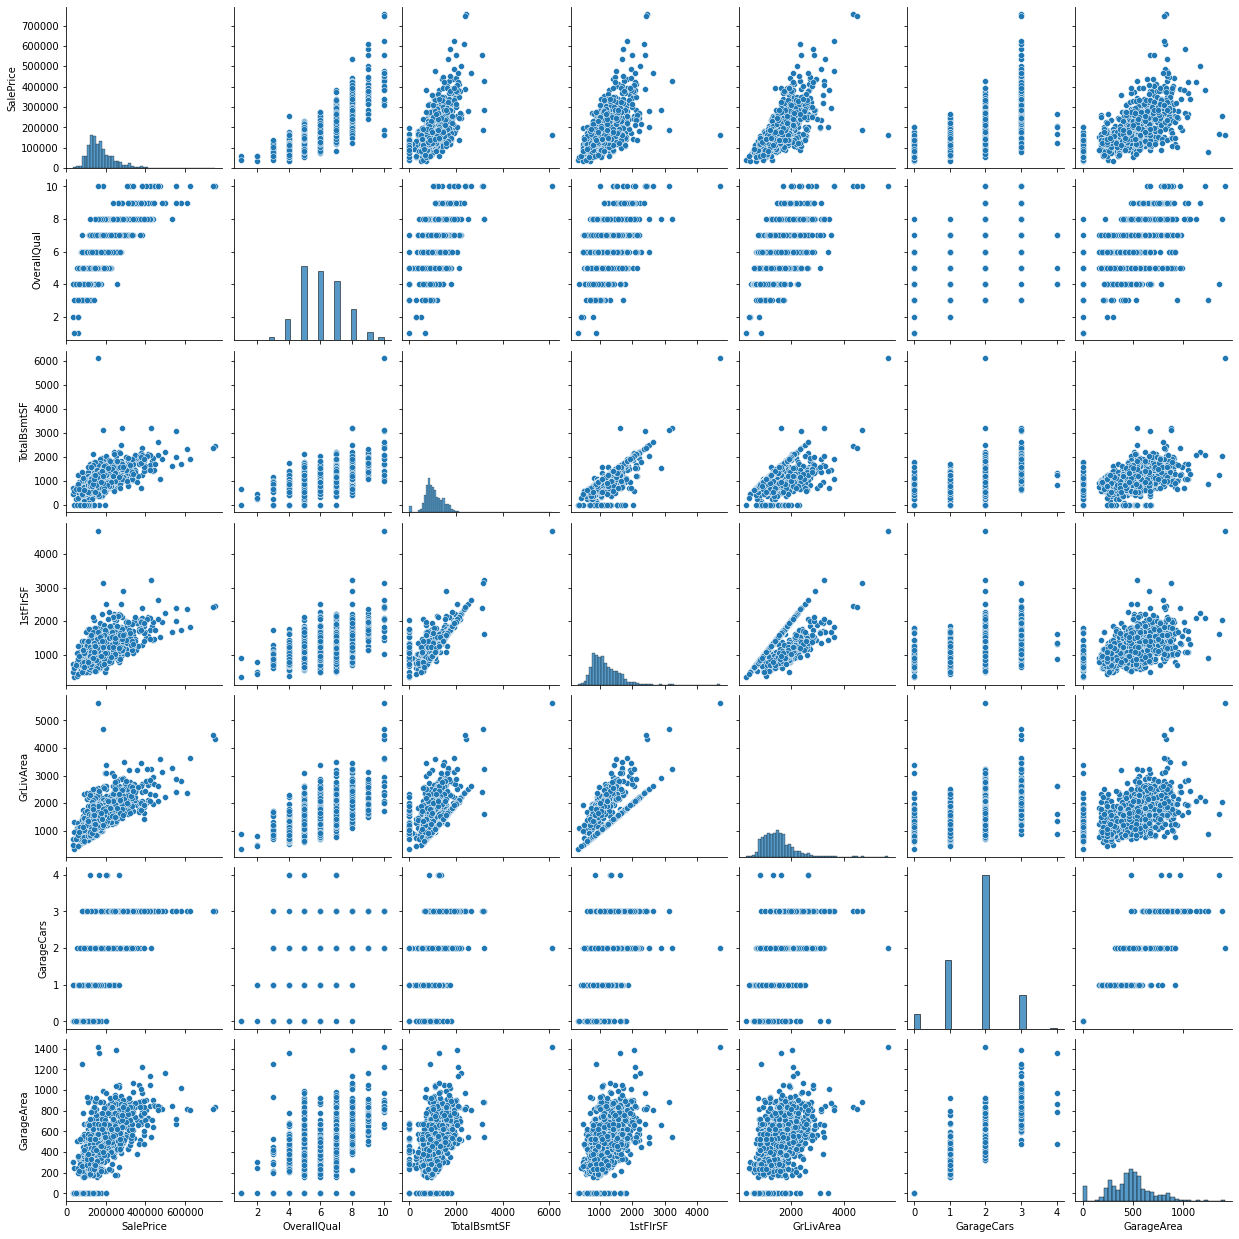

In [29]:
plt.rcParams["figure.figsize"] = (19,15)
sns.pairplot(df[list])

## Regression Plot

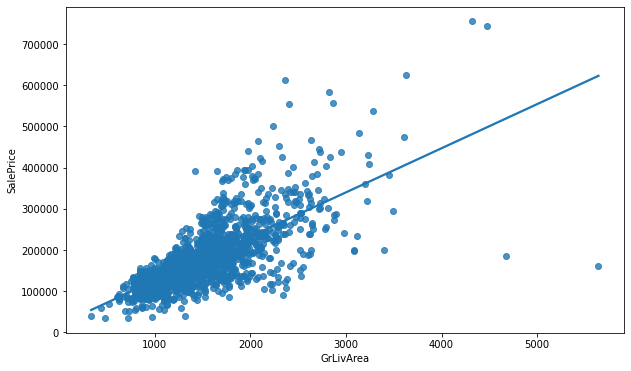

In [17]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = df, ci = None);

# Data Cleaning

## Missing Values

In [18]:
df.isnull().sum().any()

True

In [24]:
df.isnull().sum().sum()

6965

## Outliers

### Visualize some features

In [30]:
#plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Drop unuseful data

### Drop several columns at once

In [ ]:
df = df.drop(["defense spending budget value", "External Debt value"], axis=1)